In [1]:
import gpstools as gps
import pandas as pd
import matplotlib.pyplot as plt
gps.__version__

'0.1.dev52+ge502589.d20230622'

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

In [3]:
station = 'TPW2'
product = 'Raw' #Clean, Filter
dfs = gps.io.sopac.load_timeseries(station, product, processor='sopac')
dfj = gps.io.sopac.load_timeseries(station, product, processor='jpl')
dfc = gps.io.sopac.load_timeseries(station, product, processor='comb')

http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_sopac_20230604/tpw2RawTrend.neu.Z
http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_jpl_20230601/tpw2RawTrend.neu.Z
http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_comb_20230607/tpw2RawTrend.neu.Z


In [4]:
# Add nevada reno for comparison
ref = 'IGS14'
tenv3 = gps.io.ungl.download_data(station, ref, overwrite=True)
dfn = gps.io.ungl.load_tenv3(tenv3)

Overwriting TPW2


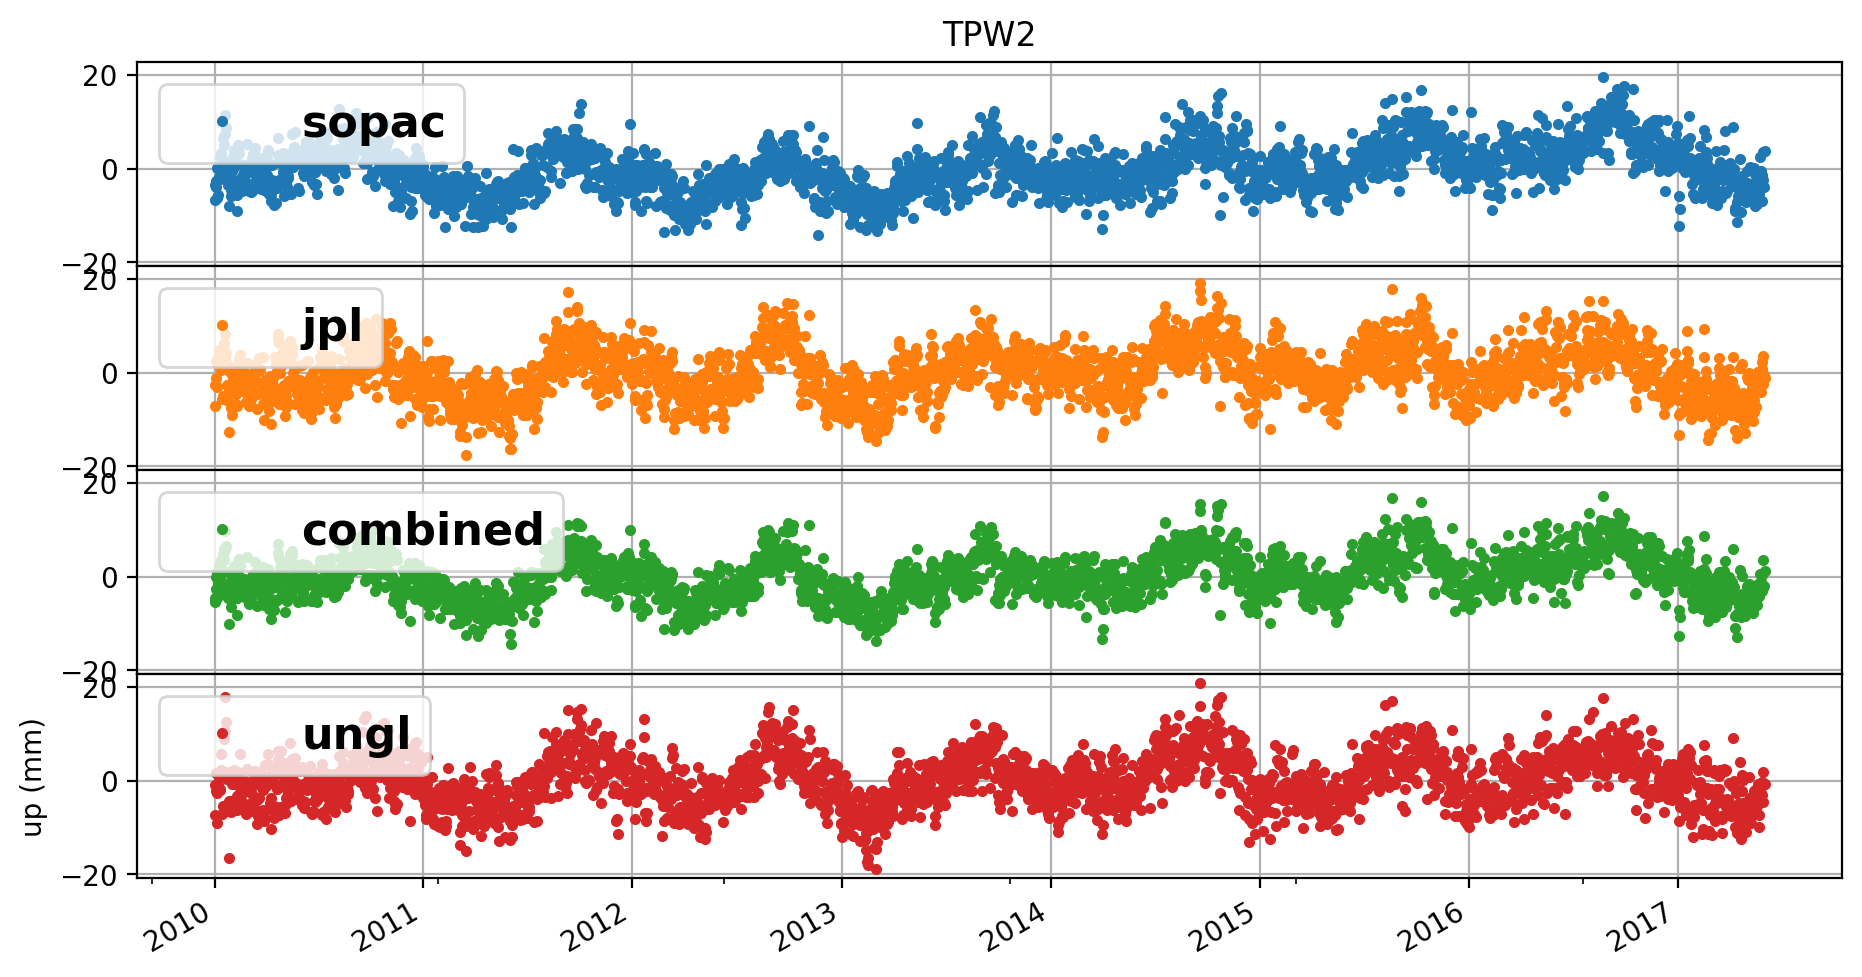

In [5]:
# Subtract mean from component to compare on same plot
#comp = 'east'
#comp = 'north'
comp = 'up'

# crop to target date range
tmp1 = dfs['2010/01/01':'2017/06/01'] 
tmp2 = dfj['2010/01/01':'2017/06/01']
tmp3 = dfc['2010/01/01':'2017/06/01']
tmp4 = dfn['2010/01/01':'2017/06/01']

# subtract mean
sopacData = tmp1[comp] - tmp1[comp].mean()
df = pd.DataFrame(dict(sopac=sopacData)) 
df['jpl'] = tmp2[comp] - tmp2[comp].mean()   
df['combined'] = tmp3[comp] - tmp3[comp].mean()  
df['ungl'] = tmp4[comp] - tmp4[comp].mean()   

axes = df.plot(subplots=True, sharey=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    #ax.legend(loc='upper left', frameon=True, fontsize='large')
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title(station)
axes[-1].set_ylabel(comp + ' (mm)');


In [6]:
station = 'HUSB'
product = 'Raw' #Clean, Filter
dfs = gps.io.sopac.load_timeseries(station, product, processor='sopac')
dfj = gps.io.sopac.load_timeseries(station, product, processor='jpl')
dfc = gps.io.sopac.load_timeseries(station, product, processor='comb')

http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_sopac_20230604/husbRawTrend.neu.Z
http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_jpl_20230601/husbRawTrend.neu.Z
http://garner.ucsd.edu/pub/measuresESESES_products/Timeseries/Current/Raw_M_TrendNeuTimeSeries_comb_20230607/husbRawTrend.neu.Z


In [7]:
tenv3 = gps.io.ungl.download_data(station, ref, overwrite=True)
dfn = gps.io.ungl.load_tenv3(tenv3)

Overwriting HUSB


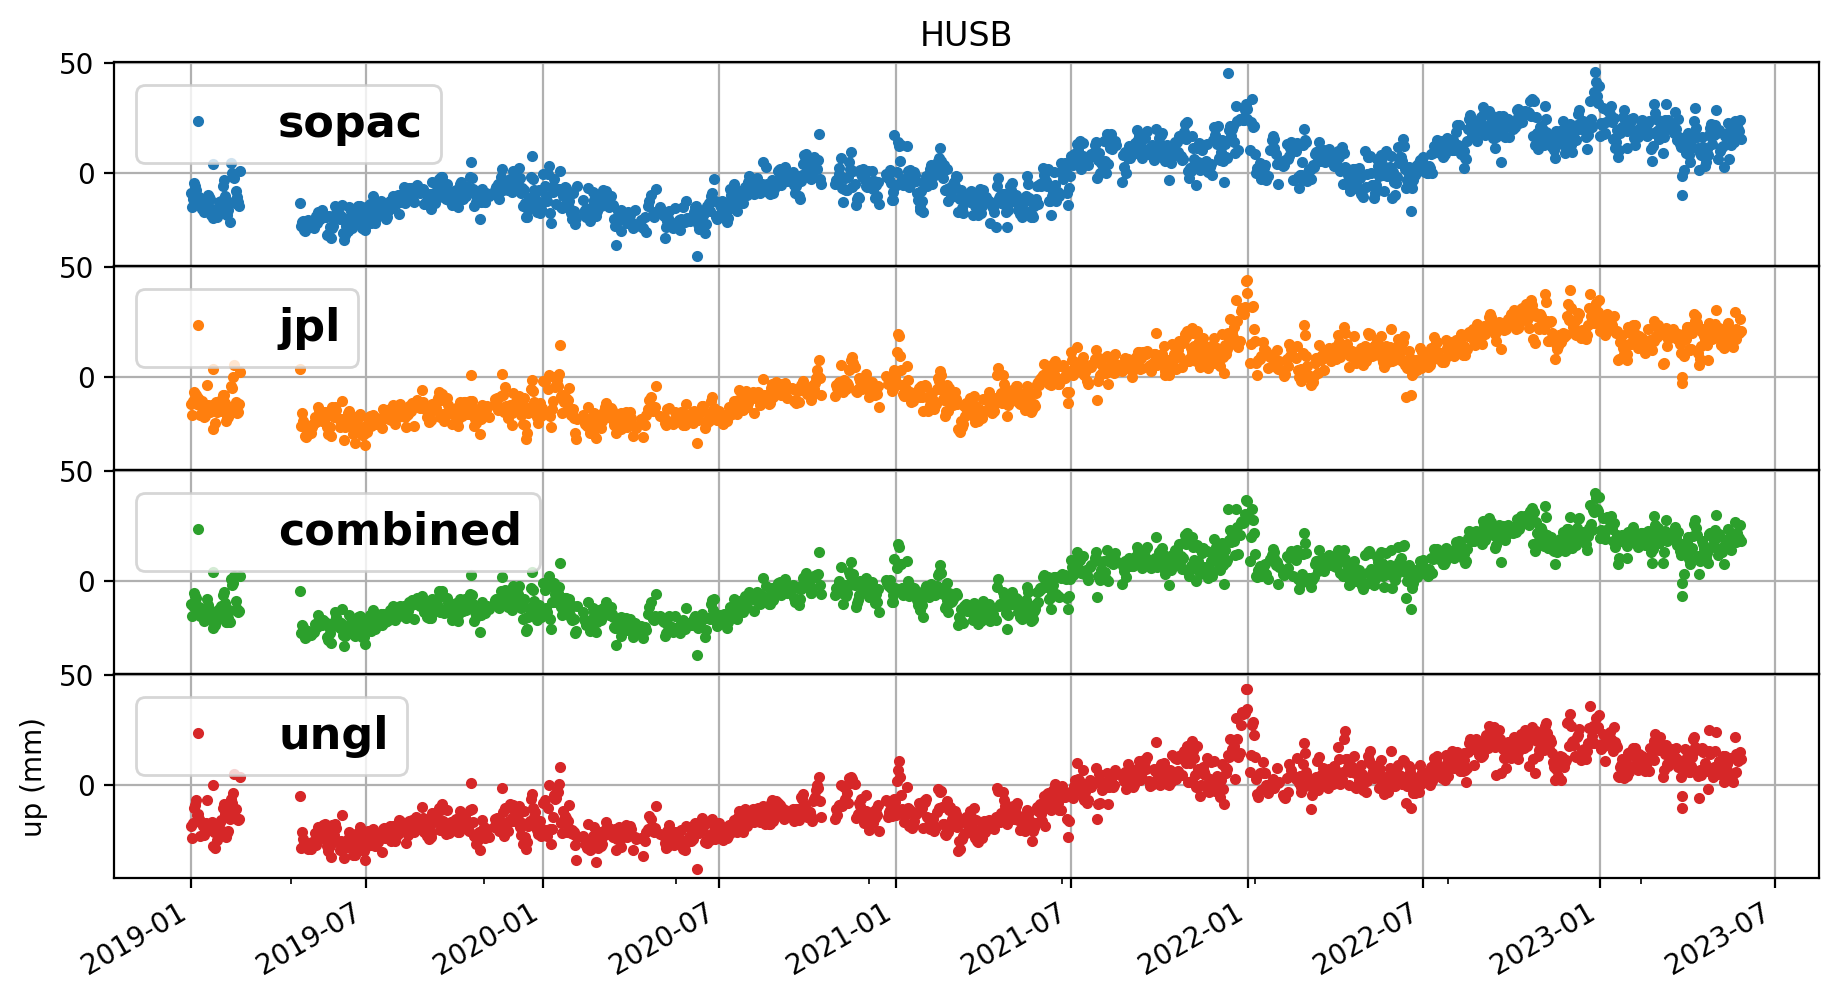

In [8]:
# Subtract mean from component to compare on same plot
#comp = 'east'
#comp = 'north'
comp = 'up'

# crop to target date range
tmp1 = dfs['2019/01/01':] 
tmp2 = dfj['2019/01/01':]
tmp3 = dfc['2019/01/01':]
tmp4 = dfn['2019/01/01':]

# subtract mean
sopacData = tmp1[comp] - tmp1[comp].mean()
df = pd.DataFrame(dict(sopac=sopacData)) 
df['jpl'] = tmp2[comp] - tmp2[comp].mean()   
df['combined'] = tmp3[comp] - tmp3[comp].mean()  
df['ungl'] = tmp4[comp] - tmp4[comp].mean()   

axes = df.plot(subplots=True, sharey=True, style='.', figsize=(11,6))
plt.subplots_adjust(hspace=0, wspace=0)
for ax in axes:
    ax.grid()
    #ax.legend(loc='upper left', frameon=True, fontsize='large')
    ax.legend(loc='upper left', frameon=True, prop=dict(size=16, weight='bold'))
    
axes[0].set_title(station)
axes[-1].set_ylabel(comp + ' (mm)');